## MODELO DE VERHULST PARA CRESCIMENTO DE FUNGOS

Na tentativa de tentar solucionar a limitação de curto intervalo de tempo do modelo Malthusiano com relação ao crescimento populacional, em 1838, Verhulst pensou na conhecida equação logística, para tentar prever o crescimento da populção Belga. Neste modelo, a população possui um crescimento exponencial inicial, mas com o passar do tempo tende a um limite máximo sustentável, resultante da competição por alimento e espaço. Assim, quando o tempo(t)  $t->\infty$, a população(N)  $N->K$. Dessa forma, após uma modificação no modelo Malthusiano, chega-se a equação:

\begin{equation}
\frac{dN}{dt} = rN(1-\frac{N}{K})
\end{equation}

Em que,
r é uma constante de crescimento
e K é o limite máximo da população


In [1]:
import numpy as np
import matplotlib.pyplot as plt

r = 0.5
K = 1000
deltat = 1e-3
N0 = 2
tf = 30000
t0=0

analitica =  lambda t: N_runge2[0]*K/((K-N0)*np.exp(-r*t) + N0)

def f(N, t):
    return r*N*(1-(N/K))

def euler(f, N0, t0, tf, deltat):
  t = np.zeros(tf)
  N_euler = np.copy(t)
  N_euler[0] = N0
  t[0] = t0

  for i in range(len(t)-1):
    N_euler[i+1] = N_euler[i] + deltat*f(N_euler[i], t[i])
    t[i+1] = t[i] + deltat
  return t, N_euler

def RK2(f, N0, t0, tf, deltat):
  t = np.zeros(tf)
  N_runge2 = np.copy(t)
  N_runge2[0] = N0
  t[0] = t0

  for i in range(len(t)-1):
    k1 = f(N_runge2[i], t[i])
    k2 = f(N_runge2[i] + k1*deltat, t[i] + deltat)
    N_runge2[i+1] = N_runge2[i] + deltat*(k1/2 + k2/2)
    t[i+1] = t[i] + deltat
  return t, N_runge2

def RK4(f, N0, t0, tf, deltat):
  t = np.zeros(tf)
  N_runge4 = np.copy(t)
  N_runge4[0] = N0
  t[0] = t0

  for i in range(len(t)-1):
    k1 = f(N_runge4[i], t[i])
    k2 = f(N_runge4[i] + deltat*k1/2, t[i] + deltat/2)
    k3 = f(N_runge4[i] + deltat*k2/2, t[i] + deltat/2)
    k4 = f(N_runge4[i] +k3*deltat, t[i] + deltat)
    N_runge4[i+1] = N_runge4[i] + deltat/6*(k1 + 2*k2 +2*k3 + k4)
    t[i+1] = t[i] + deltat

  return t, N_runge4 

In [2]:
t, N_euler = euler(f, N0, t0, tf, deltat)
t, N_runge2 = RK2(f, N0, t0, tf, deltat)
t, N_runge4 = RK4(f, N0, t0, tf, deltat)
analitica_vetor = np.copy(t)
analitica_vetor = analitica(t)

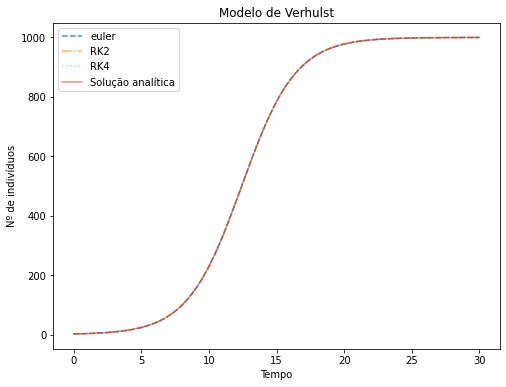

In [3]:
plt.figure(figsize=(8,6))
plt.plot(t, N_euler, '--', label ='euler', alpha=0.8)
plt.plot(t, N_runge2, '-.', label ='RK2', alpha=0.6)
plt.plot(t, N_runge4, ':', label ='RK4', alpha=0.4)
plt.plot(t, analitica_vetor, label="Solução analítica", alpha  =0.5)
plt.title('Modelo de Verhulst')
plt.ylabel('Nº de indivíduos')
plt.xlabel('Tempo')
plt.legend()
plt.show()



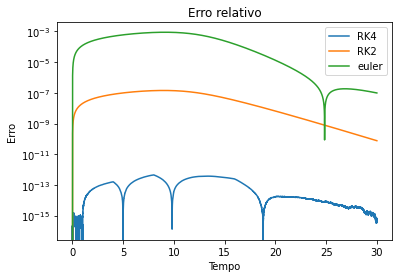

In [4]:
plt.plot(t, abs(N_runge4 - analitica_vetor)/analitica_vetor, label = "RK4")
plt.plot(t, abs(N_runge2 - analitica_vetor)/analitica_vetor, label = 'RK2')
plt.plot(t, abs(N_euler - analitica_vetor)/analitica_vetor, label='euler')
plt.legend()
plt.yscale('log')
plt.title('Erro relativo')
plt.ylabel('Erro')
plt.xlabel('Tempo')
plt.show()

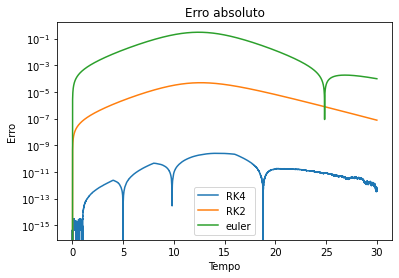

In [5]:
plt.plot(t, abs(N_runge4 - analitica_vetor), label = "RK4")
plt.plot(t, abs(N_runge2 - analitica_vetor), label = 'RK2')
plt.plot(t, abs(N_euler - analitica_vetor), label='euler')
plt.legend()
plt.yscale('log')
plt.title('Erro absoluto')
plt.ylabel('Erro')
plt.xlabel('Tempo')
plt.show()

Referências

https://www.youtube.com/watch?v=UMw65X1AerI
https://www.fc.unesp.br/Home/Departamentos/Matematica/revistacqd2228/v02n02a09-os-modelos-de-crescimento-populacional.pdf